In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Speechprocessing.m4a to Speechprocessing.m4a


In [ ]:
!pip install librosa soundfile scipy pydub


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
from scipy.signal import resample
from pydub import AudioSegment
from IPython.display import Audio


/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


In [ ]:
# Convert M4A to WAV
m4a_file = "Speechprocessing.m4a"
wav_file = "myvoice.wav"

audio = AudioSegment.from_file(m4a_file, format="m4a")
audio.export(wav_file, format="wav")

print("Conversion complete: M4A → WAV")


Conversion complete: M4A → WAV


In [ ]:
y, sr = librosa.load(wav_file, sr=None)

print("Sample Rate:", sr)
print("Number of Samples:", len(y))
print("Duration (seconds):", len(y)/sr)


Sample Rate: 44100
Number of Samples: 579584
Duration (seconds): 13.142494331065759


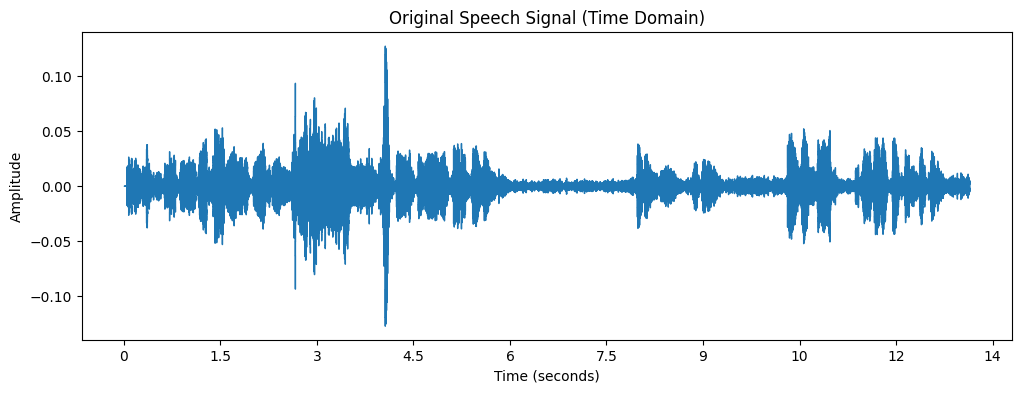

In [ ]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(y, sr=sr)
plt.title("Original Speech Signal (Time Domain)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
frame_length = 1024
hop_length = 512

energy = np.array([
    np.sum(np.abs(y[i:i+frame_length]**2))
    for i in range(0, len(y), hop_length)
])

threshold = np.mean(energy) * 0.1
active_frames = energy > threshold
active_duration = np.sum(active_frames) * (hop_length/sr)

print("Total Duration:", len(y)/sr, "seconds")
print("Active Speech Duration:", active_duration, "seconds")


Total Duration: 13.142494331065759 seconds
Active Speech Duration: 9.682721088435374 seconds


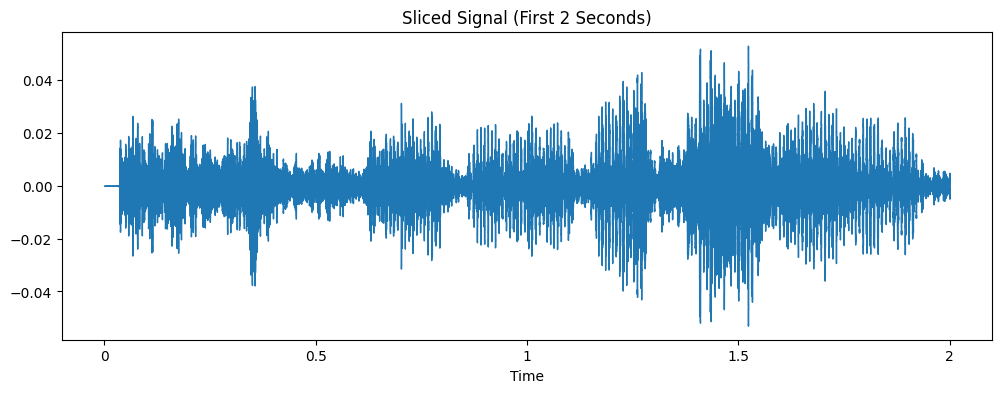

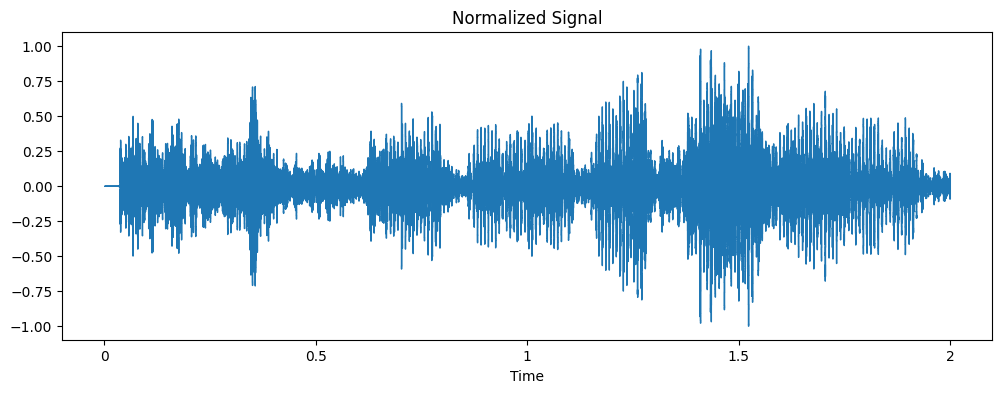

In [ ]:

slice_duration = 2
num_samples = int(slice_duration * sr)
y_slice = y[:num_samples]


y_norm = y_slice / np.max(np.abs(y_slice))


plt.figure(figsize=(12,4))
librosa.display.waveshow(y_slice, sr=sr)
plt.title("Sliced Signal (First 2 Seconds)")
plt.show()


plt.figure(figsize=(12,4))
librosa.display.waveshow(y_norm, sr=sr)
plt.title("Normalized Signal")
plt.show()


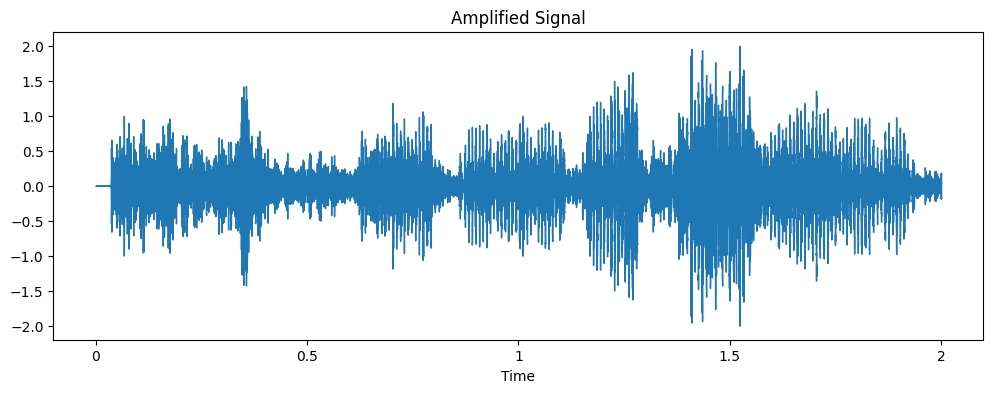

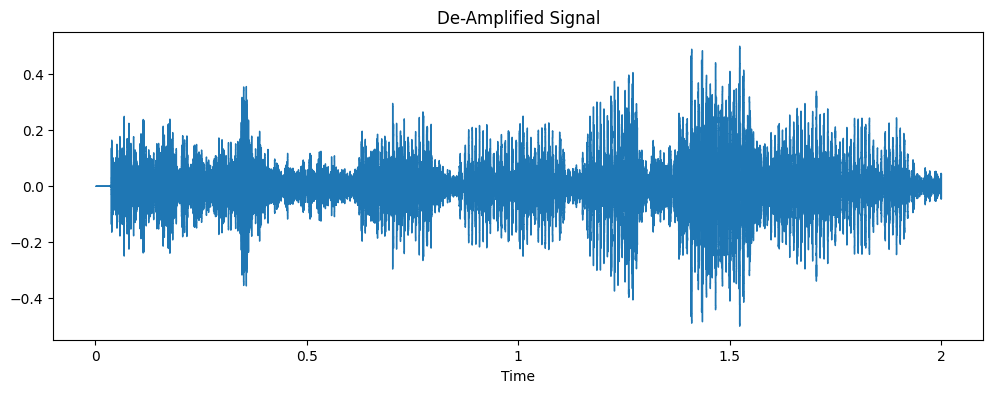

In [ ]:

y_amp = y_norm * 2


y_deamp = y_norm * 0.5

plt.figure(figsize=(12,4))
librosa.display.waveshow(y_amp, sr=sr)
plt.title("Amplified Signal")
plt.show()

plt.figure(figsize=(12,4))
librosa.display.waveshow(y_deamp, sr=sr)
plt.title("De-Amplified Signal")
plt.show()


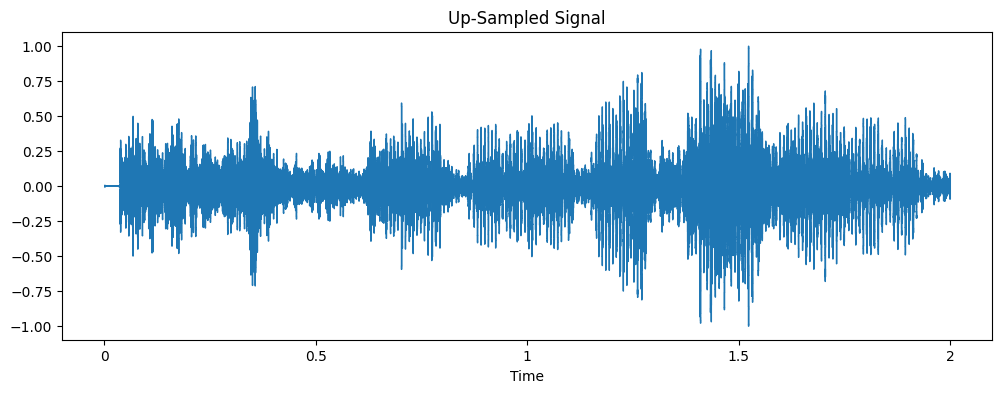

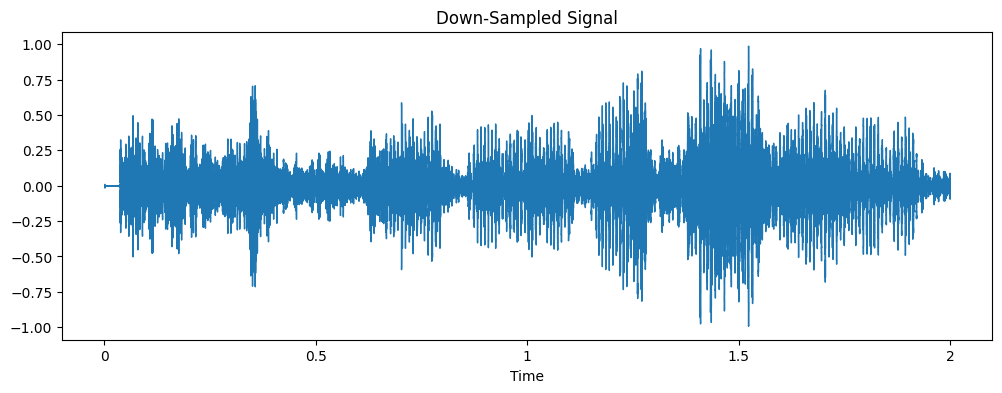

In [ ]:

y_up = resample(y_norm, len(y_norm)*2)


y_down = resample(y_norm, len(y_norm)//2)

plt.figure(figsize=(12,4))
librosa.display.waveshow(y_up, sr=sr*2)
plt.title("Up-Sampled Signal")
plt.show()

plt.figure(figsize=(12,4))
librosa.display.waveshow(y_down, sr=sr//2)
plt.title("Down-Sampled Signal")
plt.show()


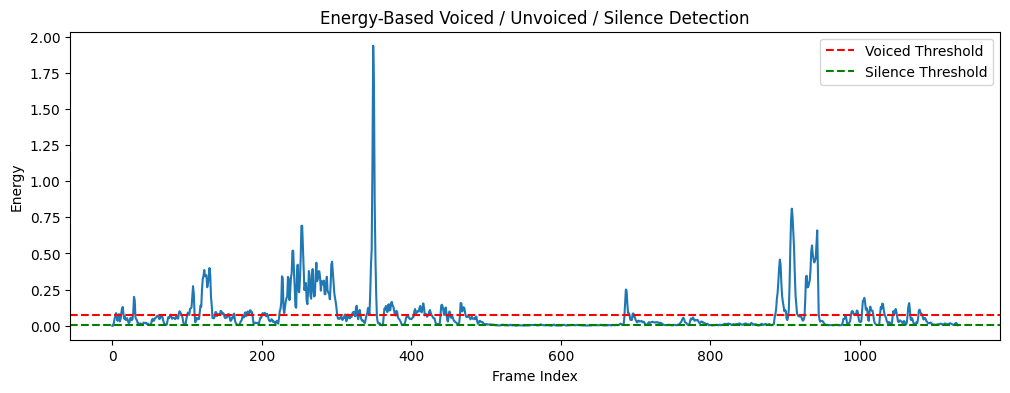

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(energy)
plt.axhline(np.mean(energy), color='r', linestyle='--', label='Voiced Threshold')
plt.axhline(np.mean(energy)*0.1, color='g', linestyle='--', label='Silence Threshold')
plt.title("Energy-Based Voiced / Unvoiced / Silence Detection")
plt.xlabel("Frame Index")
plt.ylabel("Energy")
plt.legend()
plt.show()


In [ ]:
Audio(y_norm, rate=sr)


Saving Speechprocessing.m4a to Speechprocessing (1).m4a


/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


Conversion complete: M4A → WAV
Sampling Rate: 44100
Signal Length: 579584


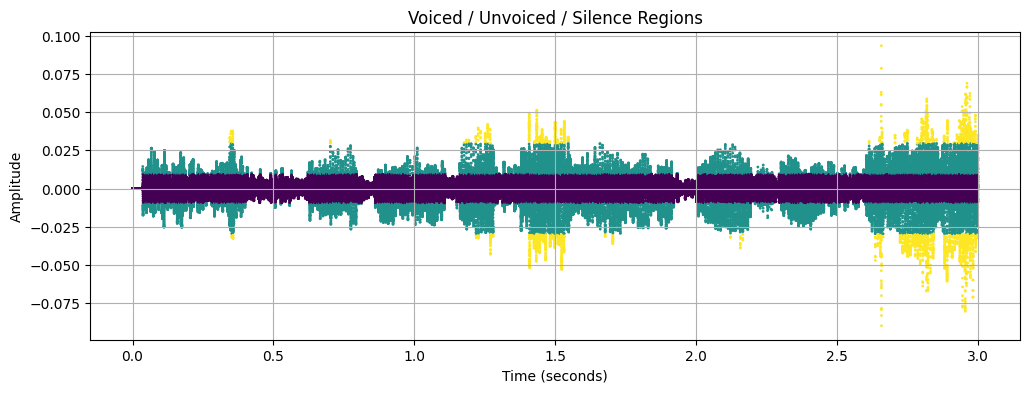

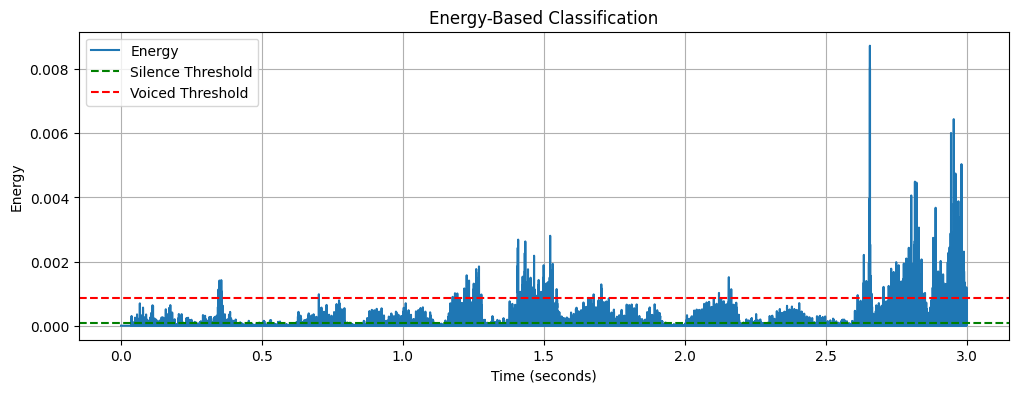

In [1]:
# Upload file
from google.colab import files
uploaded = files.upload()

# Install required libraries
!pip install librosa soundfile scipy pydub

# Imports
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
from scipy.signal import resample
from pydub import AudioSegment
from IPython.display import Audio

input_filename = list(uploaded.keys())[0]

wav_file = "converted_audio.wav"

audio = AudioSegment.from_file(input_filename)
audio.export(wav_file, format="wav")

print("Conversion complete: M4A → WAV")
# Load WAV file
signal, sr = librosa.load(wav_file, sr=None)

print("Sampling Rate:", sr)
print("Signal Length:", len(signal))
start_time = 0
end_time = 3  # seconds

start_sample = int(start_time * sr)
end_sample = int(end_time * sr)

sliced_signal = signal[start_sample:end_sample]

time_slice = np.linspace(start_time, end_time, len(sliced_signal))
# Energy-based classification
energy_slice = sliced_signal**2

silence_th = 0.01 * np.max(energy_slice)
voiced_th = 0.1 * np.max(energy_slice)

labels = np.zeros(len(energy_slice))

labels[energy_slice < silence_th] = 0       # Silence
labels[(energy_slice >= silence_th) & (energy_slice < voiced_th)] = 1  # Unvoiced
labels[energy_slice >= voiced_th] = 2       # Voiced
plt.figure(figsize=(12,4))
plt.scatter(time_slice, sliced_signal, c=labels, cmap="viridis", s=1)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Voiced / Unvoiced / Silence Regions")
plt.grid()
plt.show()
plt.figure(figsize=(12,4))
plt.plot(time_slice, energy_slice, label="Energy")
plt.axhline(silence_th, color='g', linestyle='--', label='Silence Threshold')
plt.axhline(voiced_th, color='r', linestyle='--', label='Voiced Threshold')
plt.xlabel("Time (seconds)")
plt.ylabel("Energy")
plt.title("Energy-Based Classification")
plt.legend()
plt.grid()
plt.show()